## Data Understanding

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("../dataset/train.csv")

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [5]:
df.shape

(74051, 10)

### What is the distribution of the target variable (Age), and does it show skewness or outliers?

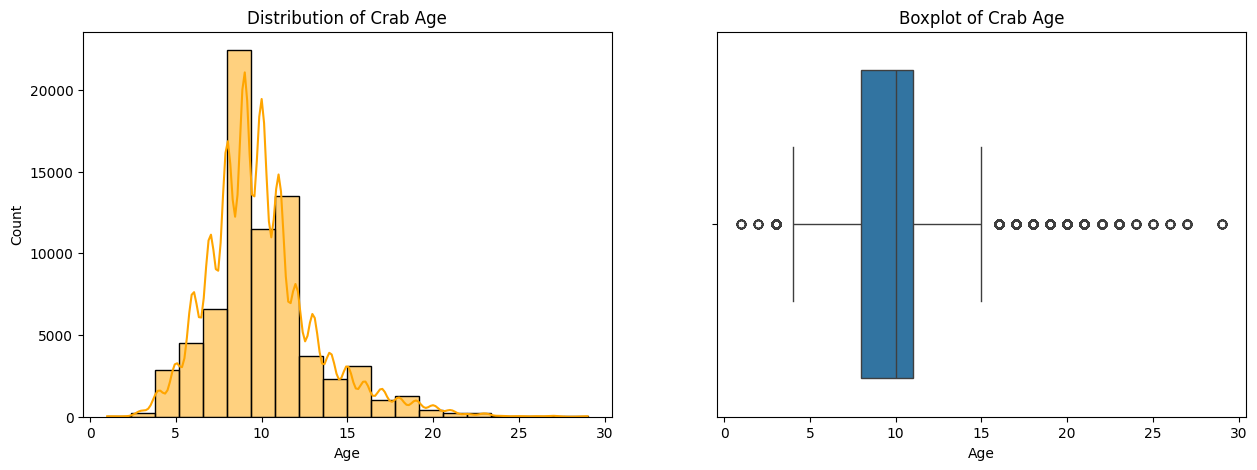

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='orange')
plt.title('Distribution of Crab Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Crab Age')

plt.show()

> The target variable Age ranges from 1 to 29!  
The histogram shows a slightly right‑skewed distribution, with most crabs concentrated between 8 and 12 years!   
The boxplot indicates the presence of outliers at the upper end of the age range!  

### Are there any extreme outliers in numerical features that could disproportionately affect regression models

In [7]:
exclude = ['id', 'Age']
num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
            if col not in exclude]

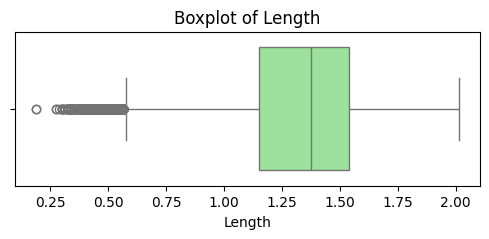

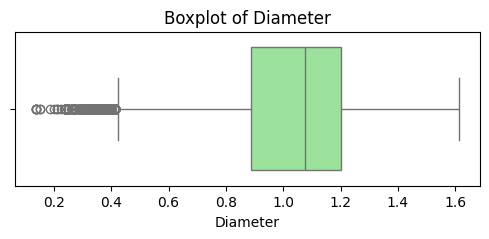

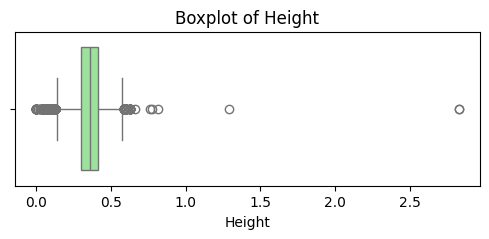

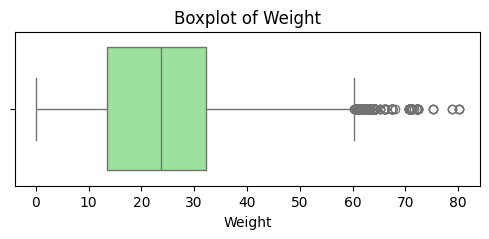

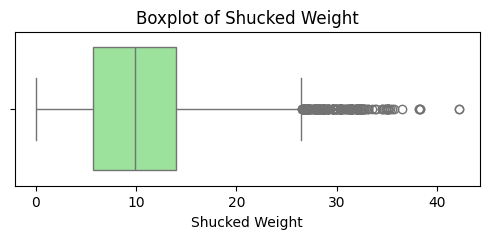

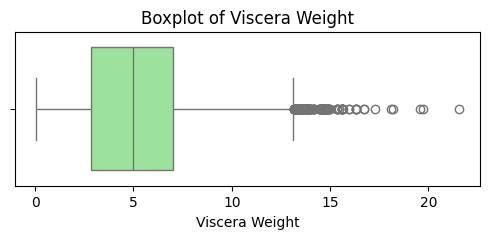

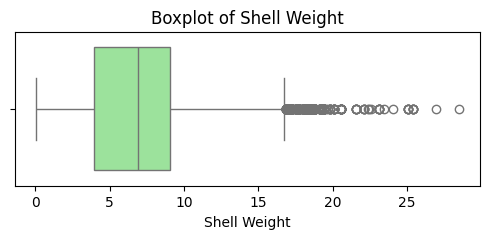

In [8]:
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [9]:
from scipy.stats import zscore

z = df[num_cols].apply(zscore)
(z.abs() > 3).sum() #  how many extreme points each feature has.

Length            491
Diameter          256
Height            160
Weight            199
Shucked Weight    269
Viscera Weight    201
Shell Weight      272
dtype: int64

> To identify extreme outliers that may affect regression performance, boxplots were generated for all numerical features!  
All numerical features have outliers and some extreme outliers. Z-Score analysis confirms that all the numerical features have some extreme outliers!  
These outliers may require transformation (e.g., log), capping, or robust regression methods!

### How does Age vary across different values of Sex?

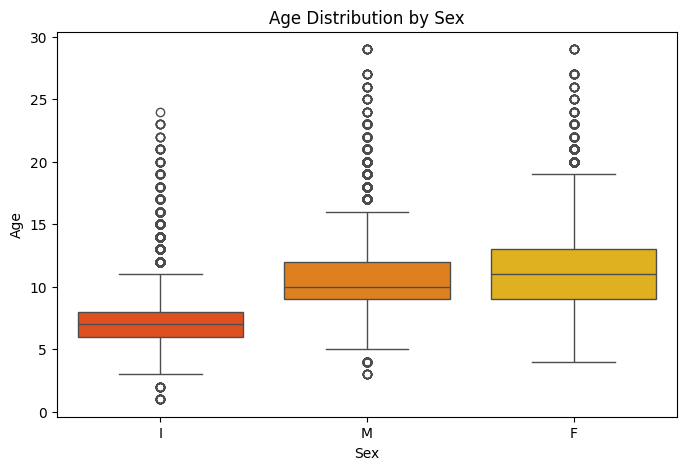

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sex', y='Age', hue='Sex', palette='autumn')
plt.title('Age Distribution by Sex')
plt.show()

In [11]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,23010.0,11.341547,2.957291,4.0,9.0,11.0,13.0,29.0
I,23957.0,7.599073,2.229675,1.0,6.0,7.0,8.0,24.0
M,27084.0,10.895953,2.882714,3.0,9.0,10.0,12.0,29.0


#### Which group is oldest on average?
1. F (Female): mean ≈ 11.34
2. M (Male): mean ≈ 10.90
3. I (Infant): mean ≈ 7.60
> So the ranking is: F > M >> I

#### Which group is youngest?
> Clearly I, with: min = 1, median = 7, 75% = 8 This group is consistently younger.

#### Which group has the widest spread (variability)?
Look at std:
1. F: 2.97
2. M: 2.88
3. I: 2.23
> So: F ≈ M > I. Females and males have similar variability. Infants are more tightly clustered around younger ages.

#### Which group has the widest range?
Range = max − min  
1. F: 29 − 4 = 25
2. M: 29 − 3 = 26
3. I: 24 − 1 = 23
> So: M has the widest range, but all three are fairly similar.

### Are any features highly correlated with Age?

In [12]:
exclude = ['id']
num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
            if col not in exclude]

In [13]:
corr = df[num_cols].corr()
corr['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
Name: Age, dtype: float64

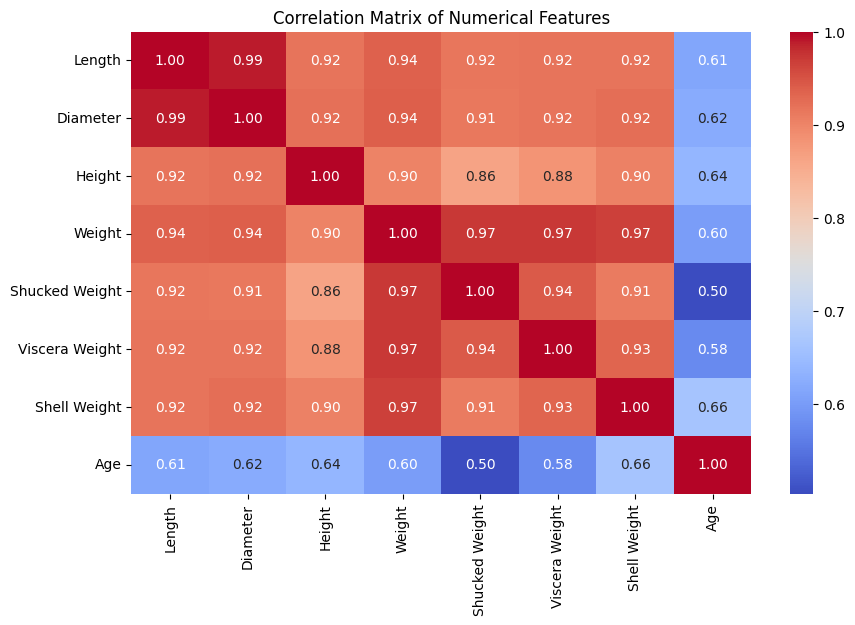

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

> All features are positively correlated with Age
This means:
1. Older crabs tend to be larger and heavier
2. Younger crabs tend to be smaller and lighter

> The strongest predictors are weight‑related features
1. As crabs age, their shell mass increases significantly
2. Size dimensions (length, diameter, height) also increase steadily
3. Even the lowest correlation (Shucked Weight = 0.50) remains moderately strong, suggesting that all numerical features contain predictive information.

> The strong inter‑correlations among weight‑related features imply multicollinearity, which may affect linear regression models!

### Do the relationships between each numerical feature and Age appear linear or non-linear?
### How does Age change with overall size metrics (Length, Diameter, Height)?

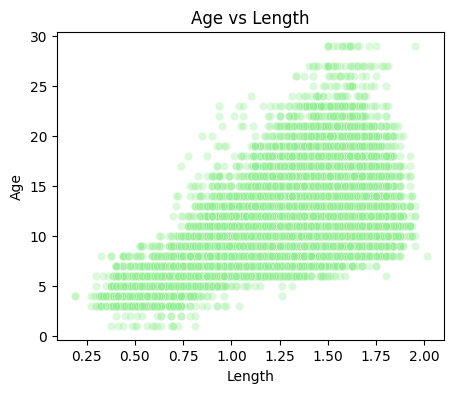

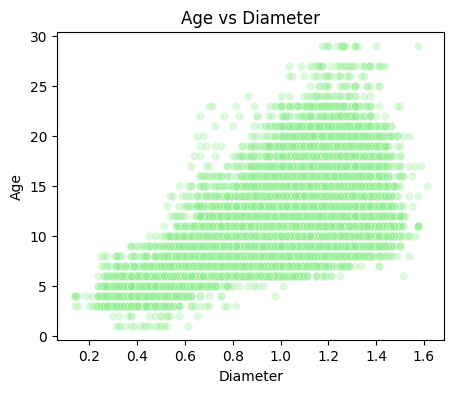

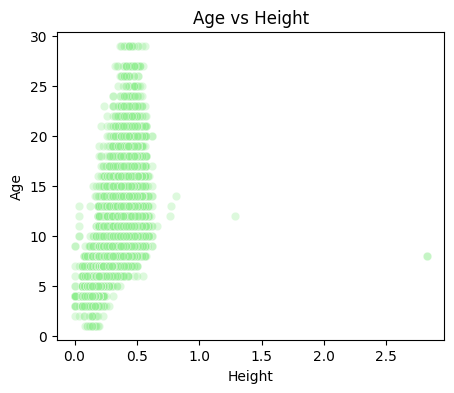

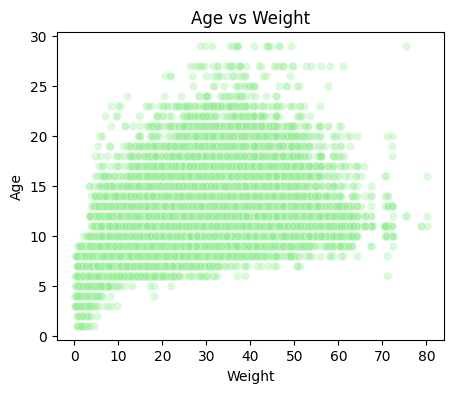

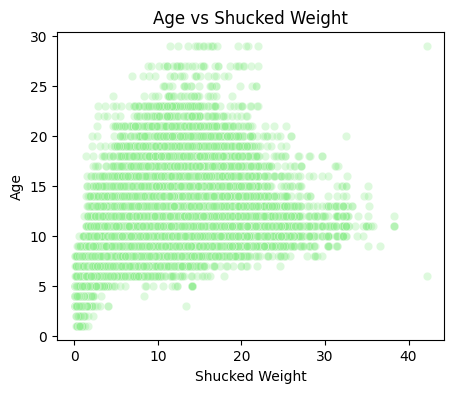

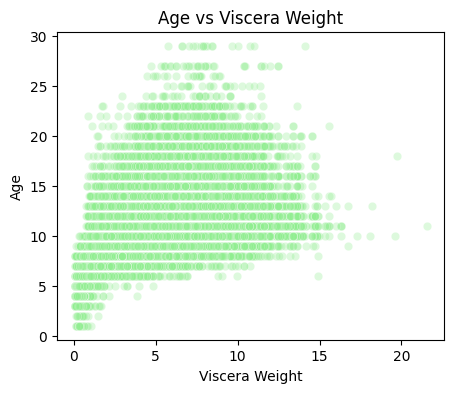

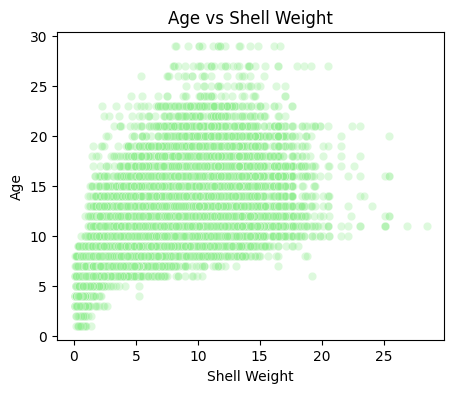

In [15]:
for col in num_cols:   
    if col != 'Age':
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=df, x=col, y='Age', alpha=0.3, color='lightgreen')
        plt.title(f"Age vs {col}")
        plt.show()

> Scatterplots of Age against each numerical feature reveal that the relationships are generally positive but not perfectly linear!  
Several features, particularly weight‑related ones, show curved or saturating patterns, suggesting non‑linear growth dynamics!  

> Scatterplots show that Age has a clear positive relationship with overall size metrics. Length and Diameter increase linearly with Age, while Height shows a steep but less gradual   increase.     Weight‑related features (Weight, Shucked Weight, Viscera Weight, Shell Weight) also increase with Age, but the relationships are non‑linear and exhibit greater spread at higher ages, indicating heteroscedasticity.



In [4]:
import numpy as np
df["log_weight"] = np.log1p(df["Weight"])
df["log_shucked"] = np.log1p(df["Shucked Weight"])
df["log_viscera"] = np.log1p(df["Viscera Weight"])
df["log_shell"] = np.log1p(df["Shell Weight"])

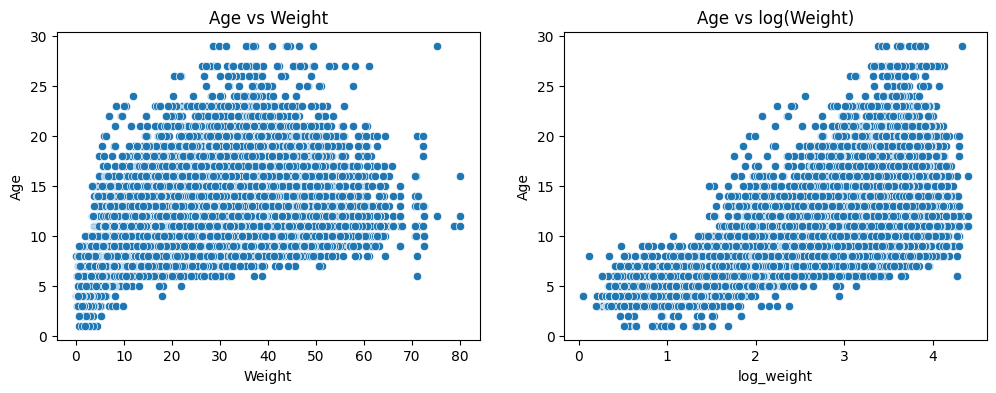

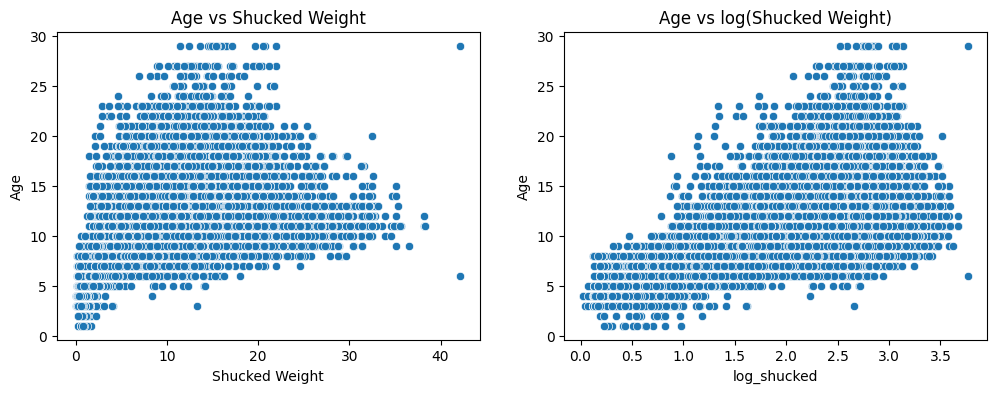

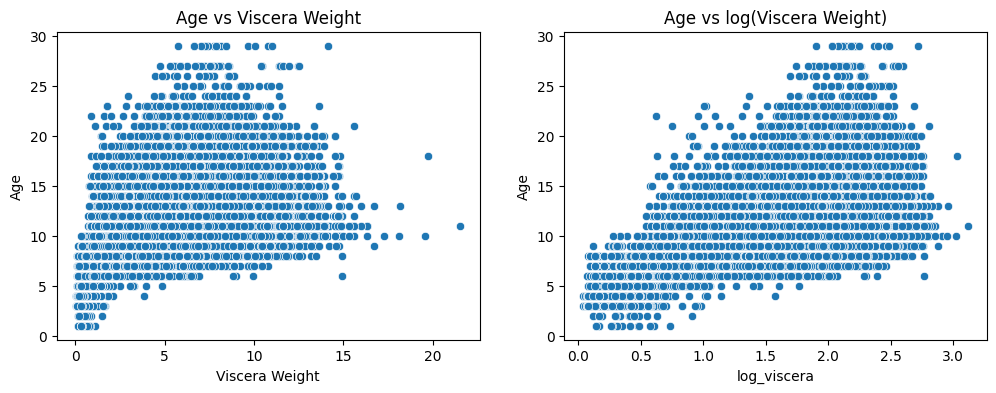

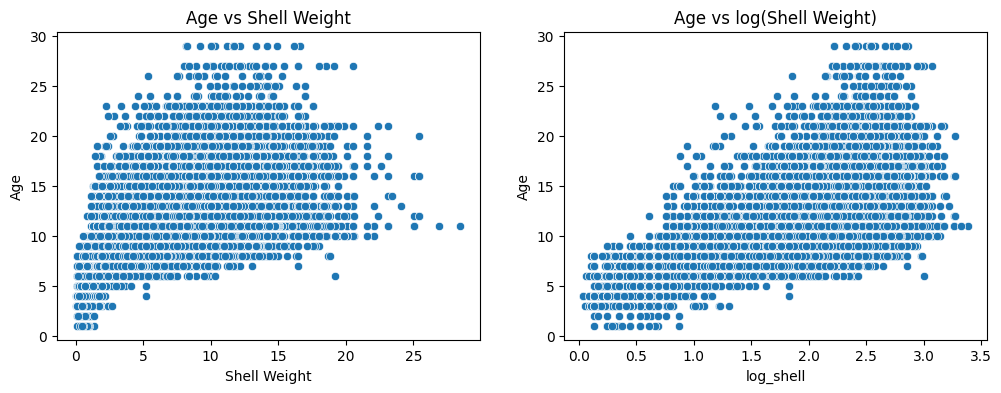

In [6]:
features = [
    ("Weight", "log_weight"),
    ("Shucked Weight", "log_shucked"),
    ("Viscera Weight", "log_viscera"),
    ("Shell Weight", "log_shell")
]

for orig, logf in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.scatterplot(x=df[orig], y=df["Age"], ax=axes[0])
    axes[0].set_title(f"Age vs {orig}")

    sns.scatterplot(x=df[logf], y=df["Age"], ax=axes[1])
    axes[1].set_title(f"Age vs log({orig})")

    plt.show()

In [7]:
for orig, logf in features:
    corr_orig = df[[orig, "Age"]].corr().iloc[0,1]
    corr_log = df[[logf, "Age"]].corr().iloc[0,1]
    print(f"{orig}: corr={corr_orig:.3f}, log corr={corr_log:.3f}")

Weight: corr=0.601, log corr=0.630
Shucked Weight: corr=0.503, log corr=0.569
Viscera Weight: corr=0.577, log corr=0.618
Shell Weight: corr=0.663, log corr=0.673


### Does Sex interact with other features in influencing Age?

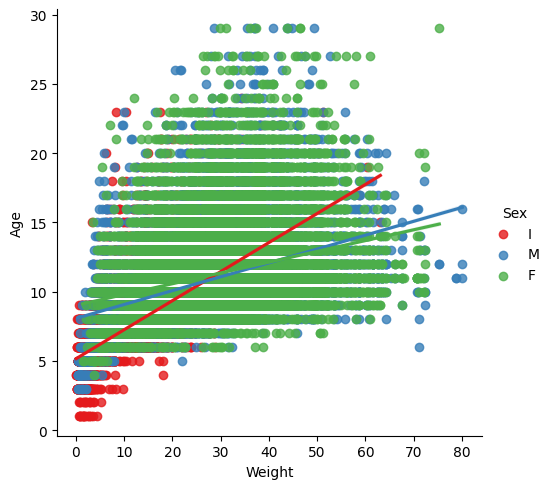

In [46]:
sns.lmplot(data=df, x='Weight', y='Age', hue='Sex', palette='Set1')

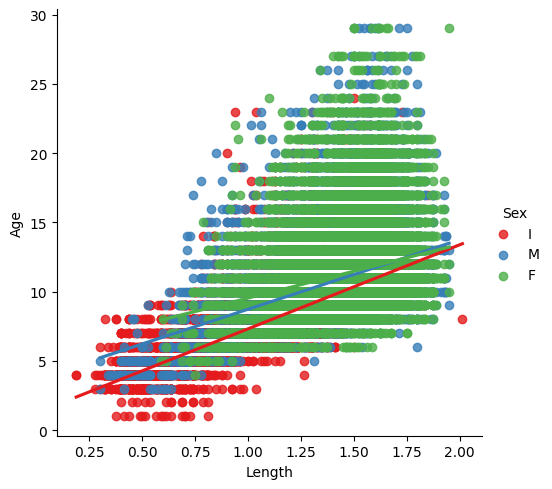

In [47]:
sns.lmplot(data=df, x='Length', y='Age', hue='Sex', palette='Set1')

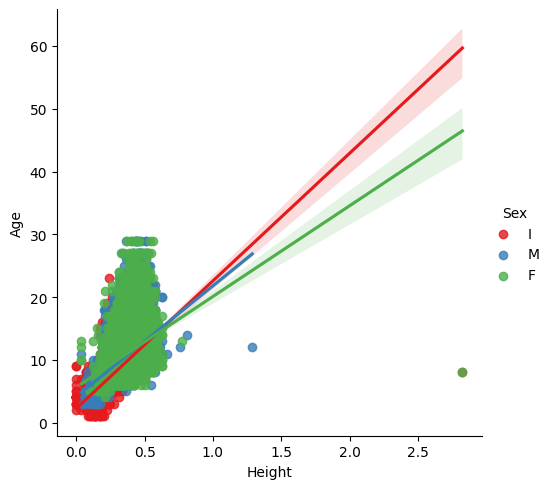

In [48]:
sns.lmplot(data=df, x='Height', y='Age', hue='Sex', palette='Set1')

> Scatterplots of Age against Length, Diameter, Height, and Weight reveal that Sex interacts with these features in influencing Age!   
Infants consistently start at lower Age values for small sizes but show steeper slopes, converging or crossing with adult groups at larger sizes!  
Height shows particularly strong interaction, with slopes differing and crossing between Sex categories!  
Weight and related features also exhibit crossing patterns, indicating that growth dynamics vary by Sex. 

In [16]:
df.head(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,8
